# Exploratory Data Analysis- Terrorism 
   (Level-Intermidiate)

By:- Rushi Pandhare

Perform 'Exploratory Data Analysis' on dataset 'Global Terrorism',as a security/defence analyst ,try to find out the hot zone of terrorism.

Dataset:- https://bit.ly/2TK5Xn5

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

data=pd.read_csv("D:\\globalterrorism.csv",encoding='latin1')

C:\Users\Rushkesh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [16]:
data.rename(columns={'iyear':'Year','imonth':'month','iday':'day','gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'state','city':'City','attacktype1_txt':'Attacktype','targtype1_txt':'Targtype','weaptype1_txt':'Weaptype','nkill':'kill','nwound':'wound'},inplace=True)

In [17]:
data=data[['Year','month','day','Group','Country','Region','state','City','latitude', 'longitude','Attacktype','Targtype','Weaptype','kill','wound','target1','summary','motive']]

In [18]:
data.head()

,Year,month,day,Group,Country,Region,state,City,latitude,longitude,Attacktype,Targtype,Weaptype,kill,wound,target1,summary,motive
0,1970,7,2,MANO-D,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,1.0,0.0,Julio Guzman,NaN,NaN
1,1970,0,0,23rd of September Communist League,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,"Nadine Chaval, daughter",NaN,NaN
2,1970,1,0,Unknown,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,1.0,0.0,Employee,NaN,NaN
3,1970,1,0,Unknown,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,U.S. Embassy,NaN,NaN
4,1970,1,0,Unknown,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,U.S. Consulate,NaN,NaN


In [20]:
data.shape

(181691, 18)

In [21]:
data.isnull().sum()

Year               0
month              0
day                0
Group              0
Country            0
Region             0
state            421
City             434
latitude        4556
longitude       4557
Attacktype         0
Targtype           0
Weaptype           0
kill           10313
wound          16311
target1          636
summary        66129
motive        131130
dtype: int64

In [22]:
data['wound']=data['wound'].fillna(0)
data['kill']=data['kill'].fillna(0)

C:\Users\Rushkesh\AppData\Local\Temp/ipykernel_19568/3541823960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['wound']=data['wound'].fillna(0)
C:\Users\Rushkesh\AppData\Local\Temp/ipykernel_19568/3541823960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kill']=data['kill'].fillna(0)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Group       181691 non-null  object 
 4   Country     181691 non-null  object 
 5   Region      181691 non-null  object 
 6   state       181270 non-null  object 
 7   City        181257 non-null  object 
 8   latitude    177135 non-null  float64
 9   longitude   177134 non-null  float64
 10  Attacktype  181691 non-null  object 
 11  Targtype    181691 non-null  object 
 12  Weaptype    181691 non-null  object 
 13  kill        181691 non-null  float64
 14  wound       181691 non-null  float64
 15  target1     181055 non-null  object 
 16  summary     115562 non-null  object 
 17  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [24]:
data.describe()

,Year,month,day,latitude,longitude,kill,wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


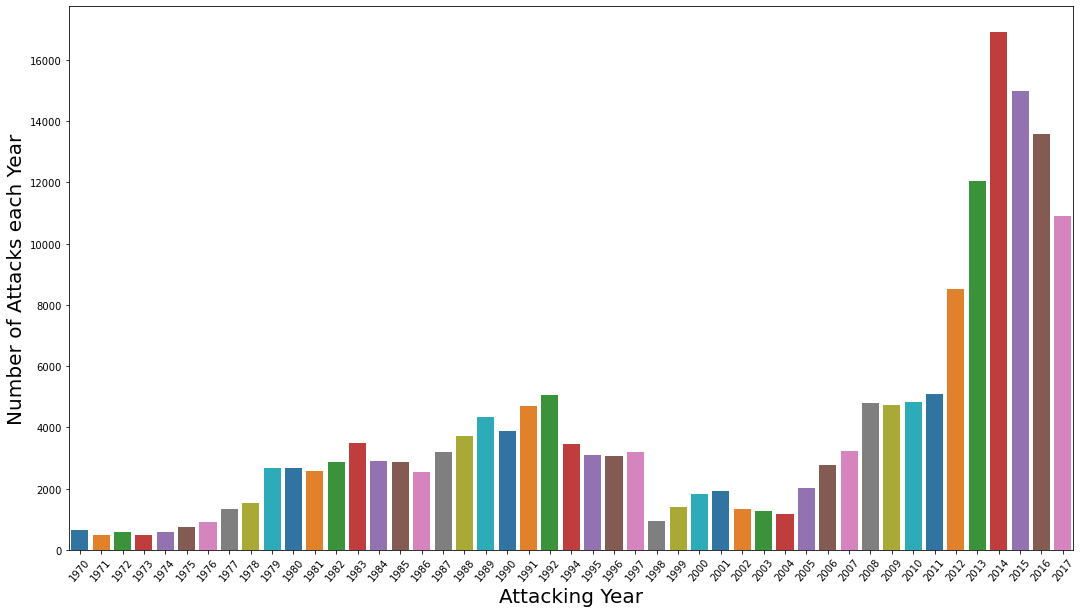

In [26]:
year=data['Year'].unique()
year_count=data['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(18,10))
sns.barplot(x=year,y=year_count,palette="tab10")
plt.xticks(rotation=50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks each Year',fontsize=20)
plt.show()

#  As show above fig we see that the number of attacks on the year '2011' is increased.

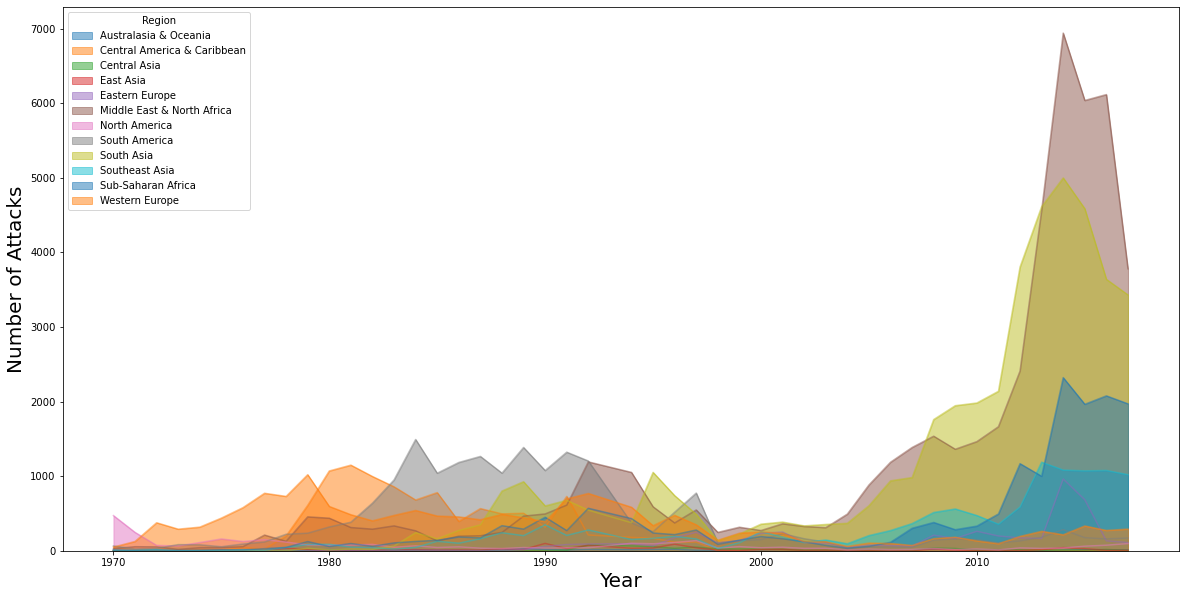

In [30]:
pd.crosstab(data.Year,data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.show()

In [32]:
attack= data.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [33]:
data.Group.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

C:\Users\Rushkesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


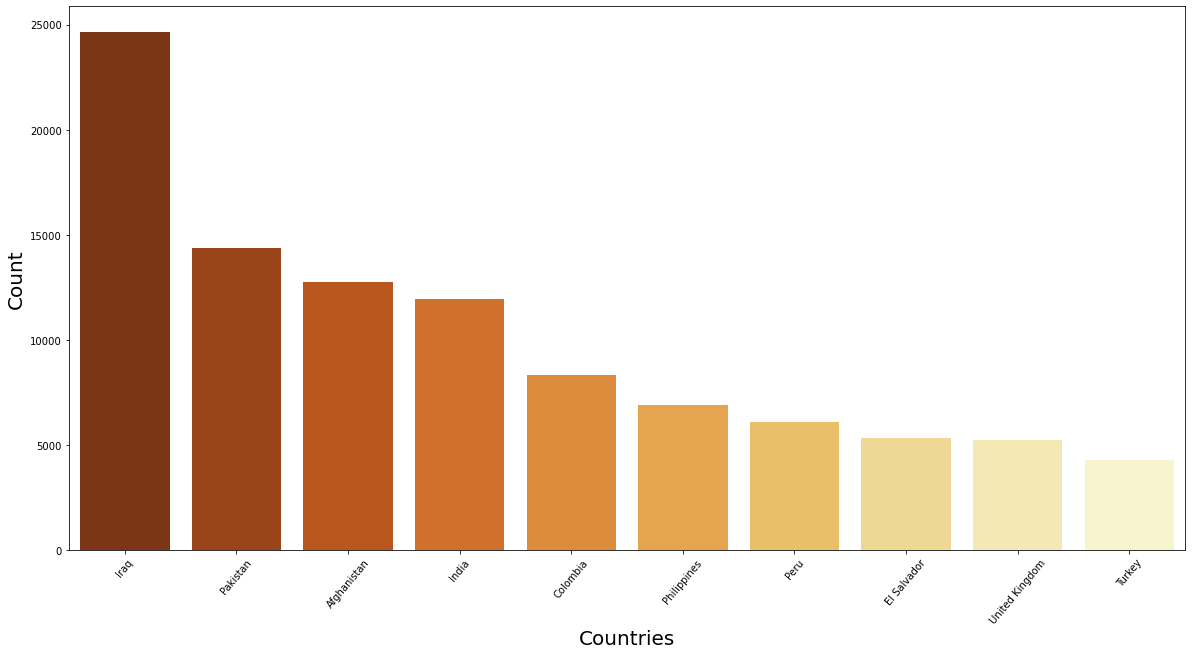

In [35]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.xticks(rotation=50)
plt.xlabel('Countries',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

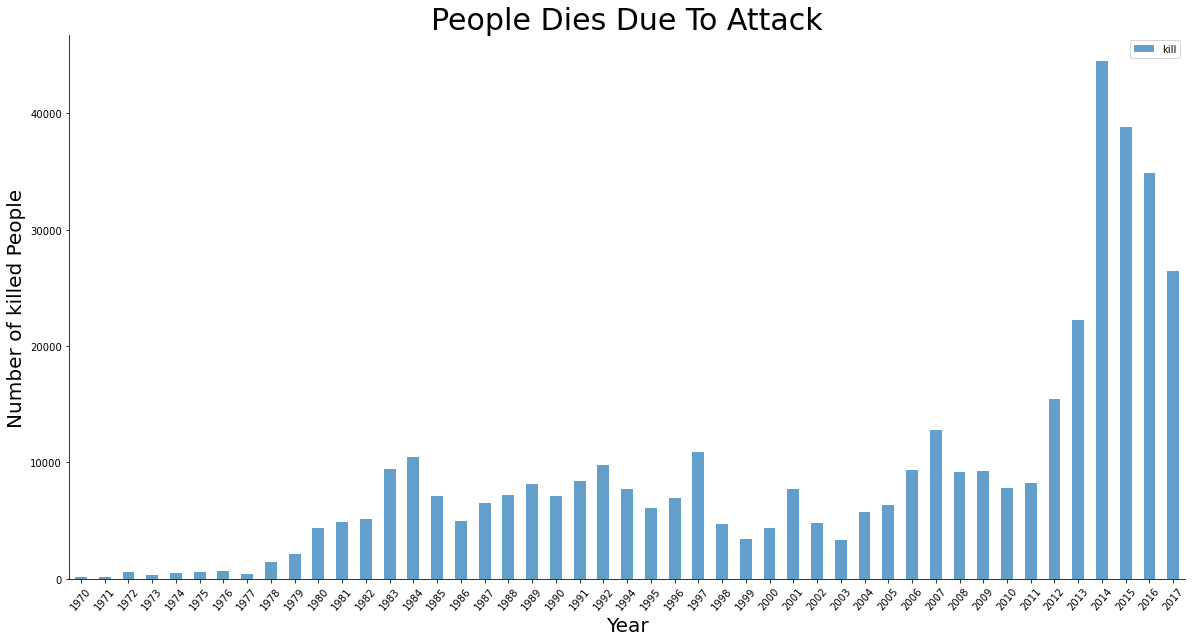

In [36]:
df=data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation=50)
plt.title('People Dies Due To Attack',fontsize=30)
plt.ylabel('Number of killed People',fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side= ax4.spines["top"]
top_side.set_visible(False)
right_side=ax4.spines["right"]
right_side.set_visible(False)

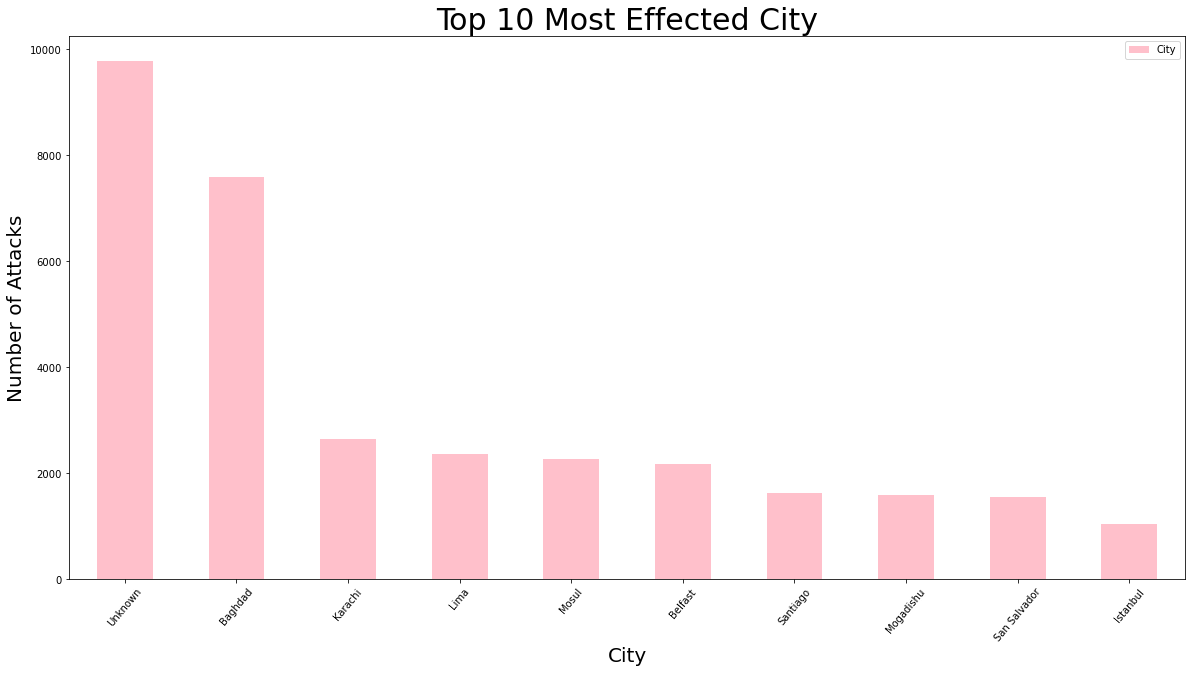

In [37]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='pink')
plt.xticks(rotation=50)
plt.title('Top 10 Most Effected City',fontsize=30)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel('City',fontsize=20)
plt.show()

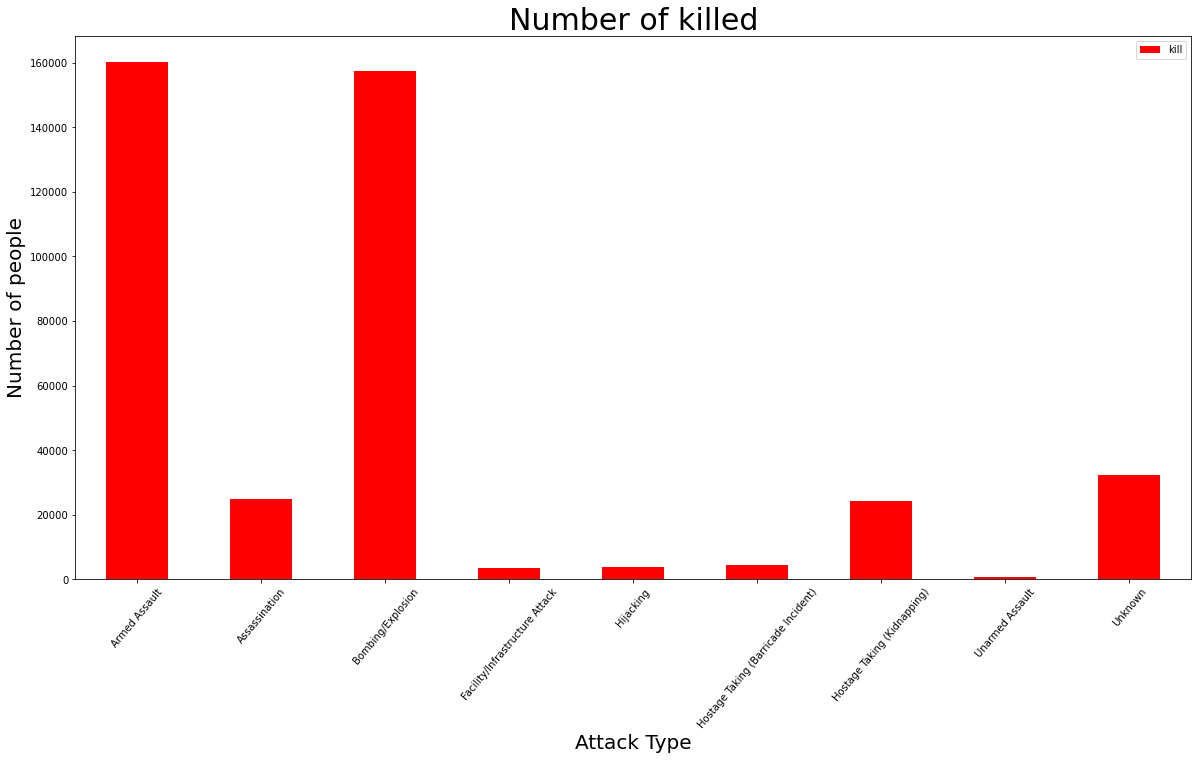

In [39]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation=50)
plt.title('Number of killed',fontsize=30)
plt.ylabel('Number of people',fontsize=20)
plt.xlabel('Attack Type',fontsize=20)
plt.show()

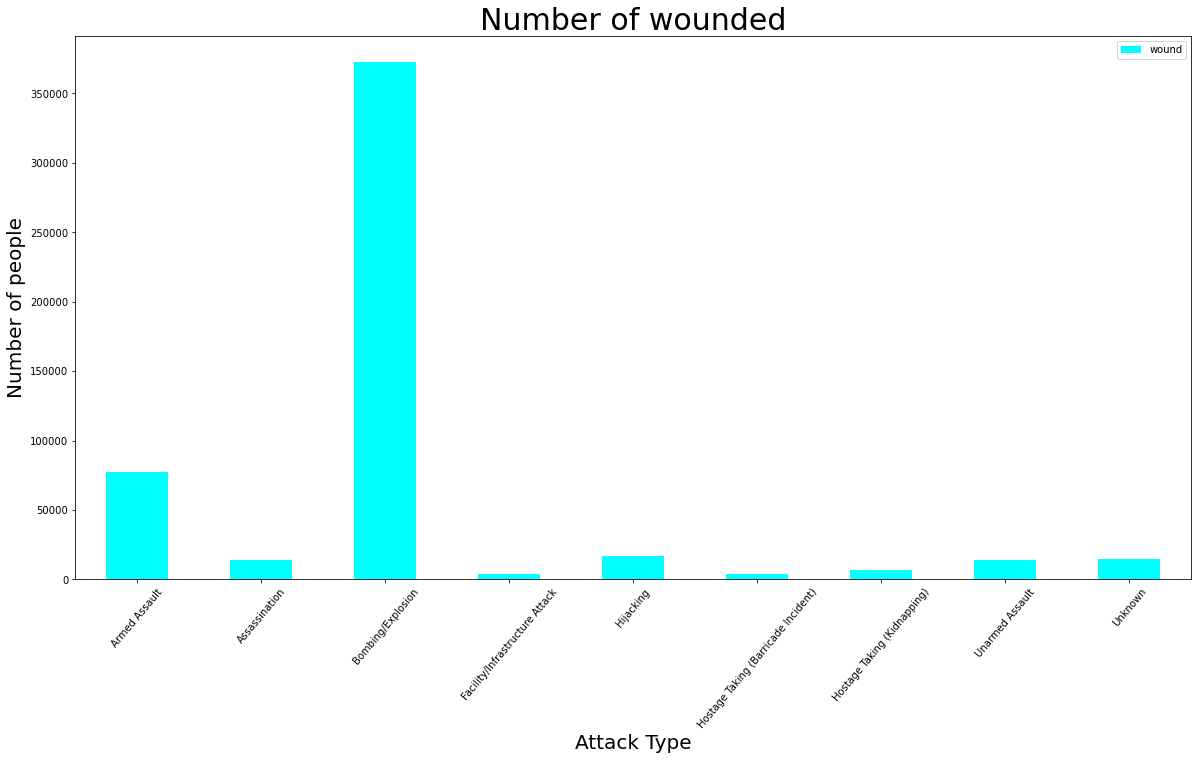

In [40]:
data[['Attacktype','wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color='cyan')
plt.xticks(rotation=50)
plt.title('Number of wounded',fontsize=30)
plt.ylabel('Number of people',fontsize=20)
plt.xlabel('Attack Type',fontsize=20)
plt.show()

C:\Users\Rushkesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


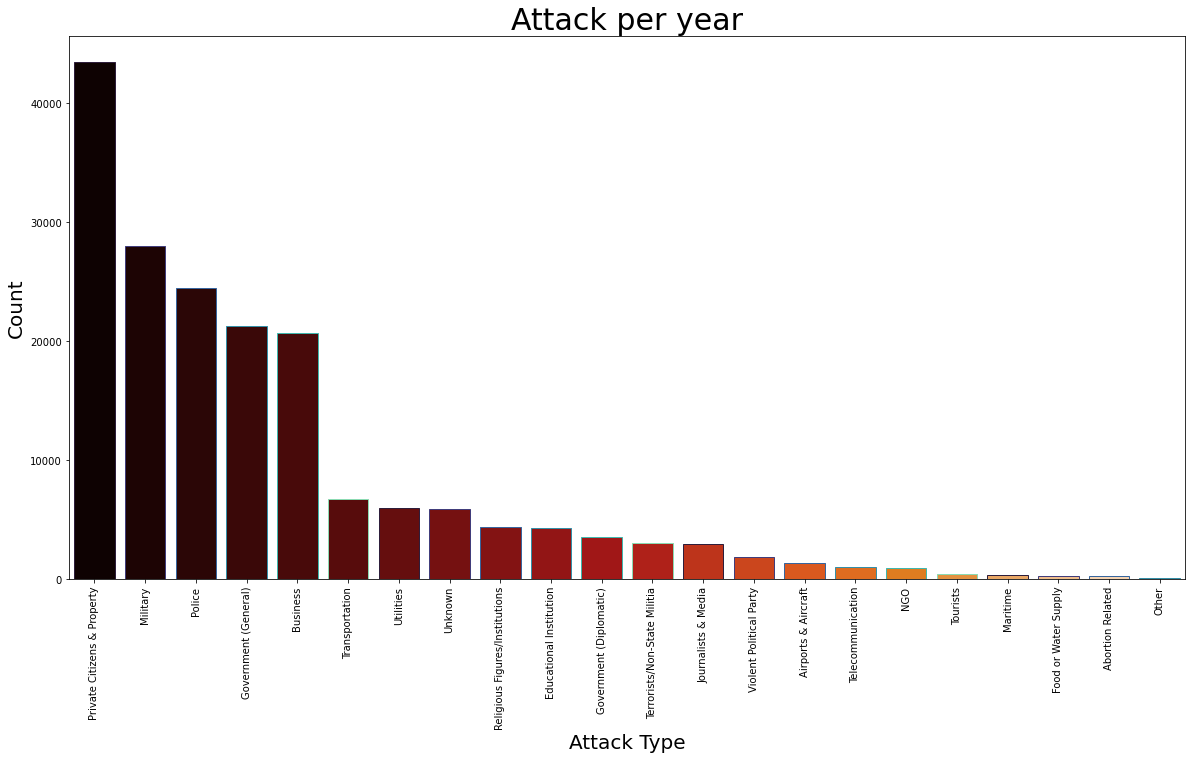

In [43]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Targtype"],order=data['Targtype'].value_counts().index,palette='gist_heat',edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.title('Attack per year',fontsize=30)
plt.ylabel('Count',fontsize=20)
plt.xlabel('Attack Type',fontsize=20)
plt.show()

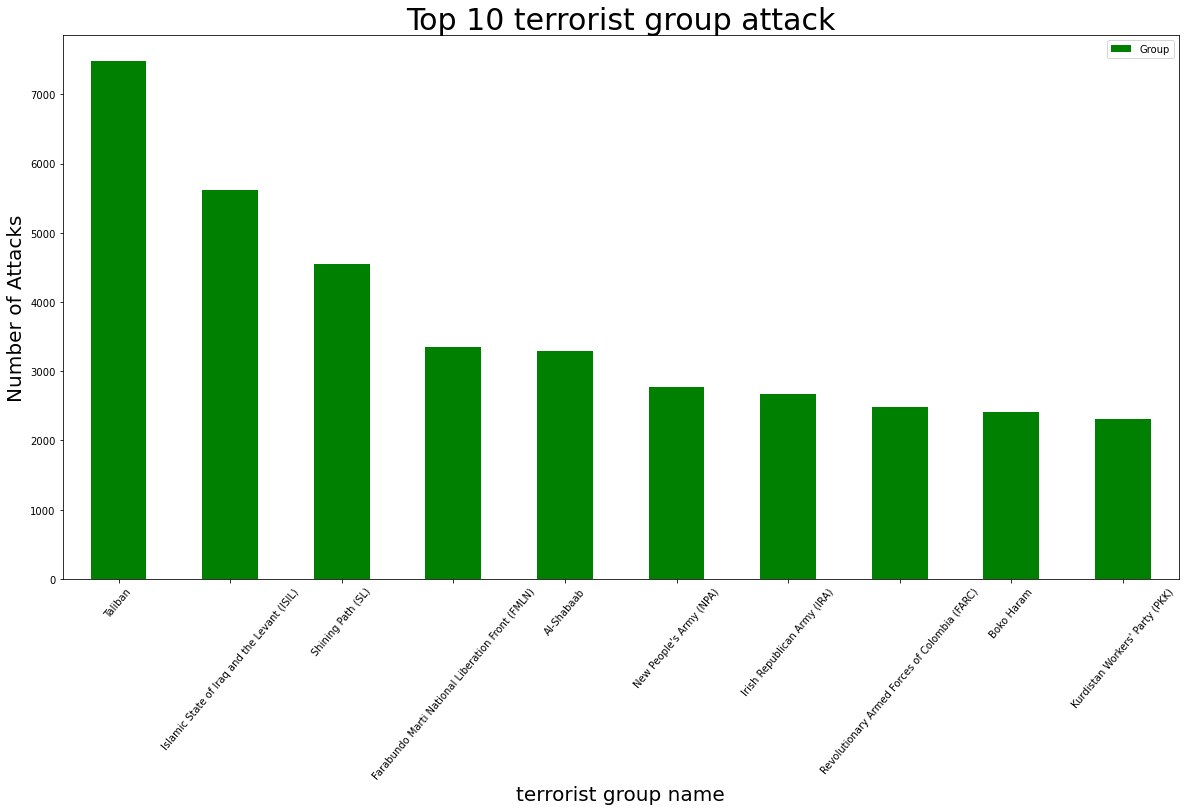

In [44]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize=(20,10),color='green')
plt.xticks(rotation=50)
plt.title('Top 10 terrorist group attack',fontsize=30)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel('terrorist group name',fontsize=20)
plt.show()

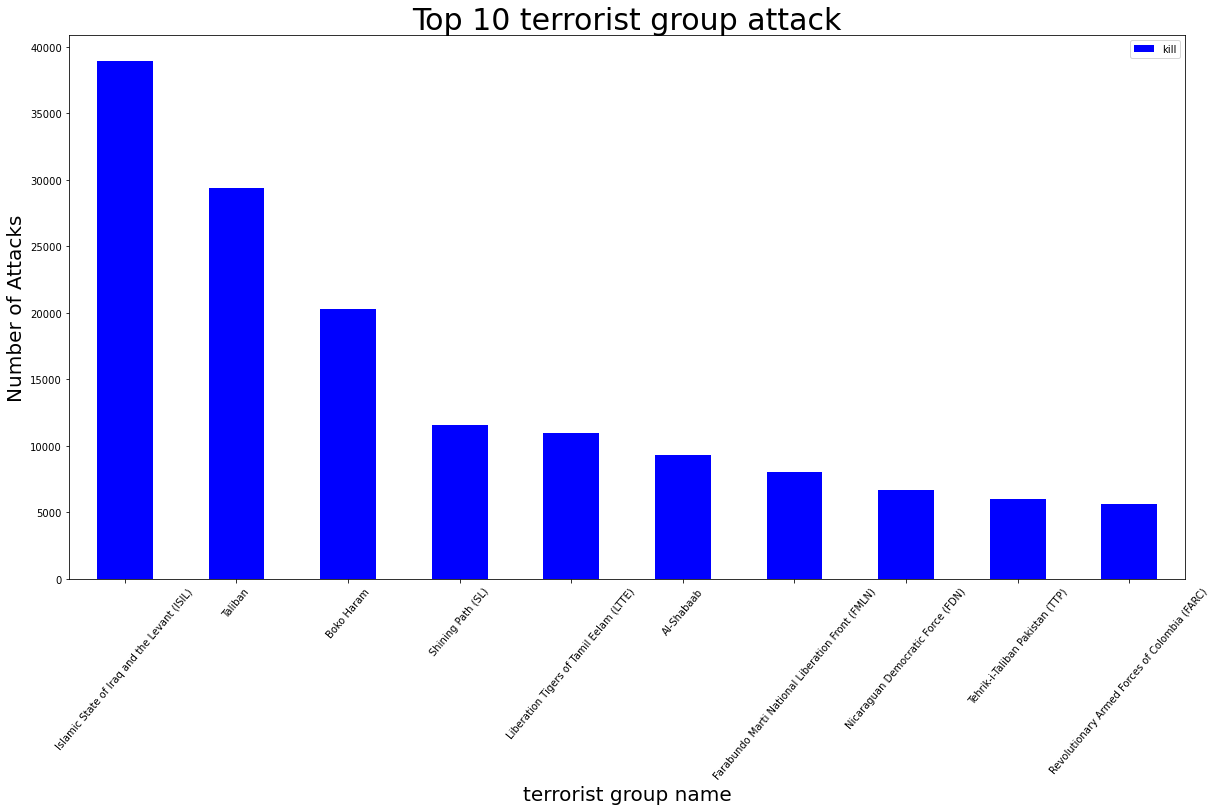

In [47]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation=50)
plt.title('Top 10 terrorist group attack',fontsize=30)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel('terrorist group name',fontsize=20)
plt.show()

In [48]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).reset_index()

In [49]:
df

,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [50]:
kill=data.loc[:,'kill']
print('Number of people killed by terror attack:',int(sum(kill.dropna())))

Number of people killed by terror attack: 411868


In [51]:
typekill=data.pivot_table(columns='Attacktype',values='kill',aggfunc='sum')
typekill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [52]:
Countrykill=data.pivot_table(columns='Country',values='kill',aggfunc='sum')
Countrykill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


# Conclusion and Result :

1) Country with the most Attacks:Iraq

2) City with the most Attacks:Baghdad

3) Year with the most Attacks:2014

4) Month with the most Attacks:5

5) Group with the most Attacks:Taliban

6) Most Attacked Type:Bombing/Explosion

# :-) Thank You !